In [18]:
import matplotlib as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sbn

In [19]:
TitanicData = pd.read_csv('titanic.csv')

In [20]:
TitanicData

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [21]:
PassengerData = TitanicData[['Survived', 'Sex', 'Pclass']].copy()

In [22]:
PassengerData

,Survived,Sex,Pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3
...,...,...,...
882,0,male,2
883,1,female,1
884,0,female,3
885,1,male,1


In [23]:
#SurvivedData = PassengerData.query('Survived == 1')

In [24]:
#LostData = PassengerData.query('Survived == 0')

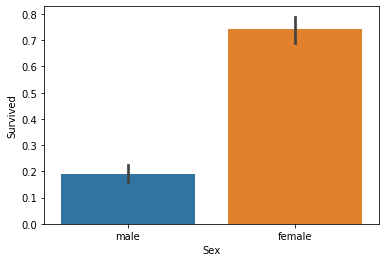

In [30]:
sbn.barplot(x='Sex',y='Survived',data=PassengerData)
SurvivedData.groupby('Sex',as_index=False)

As can be seen in the above, over 70% of women aboard the Titanic survived which makes sense. I think anyone who ever heard or read about the Titanic knows that it sunk after hitting an iceberg and the old "women and children" first mantra.

# Lost vs Survived by Sex

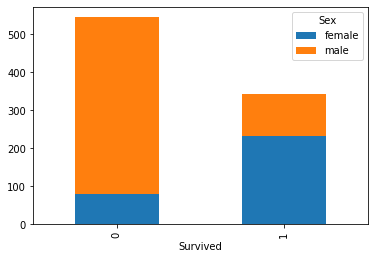

In [64]:
SurvivalBySex = PassengerData.groupby(['Survived', 'Sex'])['Survived'].count().unstack('Sex').fillna(0)
SurvivalBySex.plot(kind='bar', stacked=True)

On the x axis, 0 stands for "lost" and 1 stands for "survived". Men are in orange, women are in blue. We can see in the stacked bar that majority of those who did not survive were men, whereas most of the survivors were compromised of women. 

# Lost vs Survived by Class

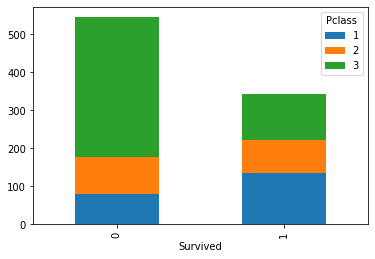

In [53]:
SurvivalByClass = PassengerData.groupby(['Survived', 'Pclass'])['Survived'].count().unstack('Pclass').fillna(0)
SurvivalByClass.plot(kind='bar', stacked=True)

On the x axis, 0 stands for "lost" and 1 stands for "survived". First class passengers are in blue, second class passengers are in orange and third class passengers are in green. 

We can see that the lowest survival rate were amongst the third class passengers which makes sense because they were lower in the boat than other passengers. These passengers experienced the most flooding. By the time the alarm was raised once the extent of the damage was noted, it was already too late for these passengers to escape. 

In terms of survival, first class passengers were most likely to survive. What is surprising is that according to this, more third class passengers survived than second class passengers. 

# Conditional Probability Given Sex and Passenger Class

In [58]:
sex_prob = PassengerData.groupby('Sex').size().div(len(PassengerData))


In [60]:
PassengerData.groupby(['Sex', 'Pclass']).size().div(len(PassengerData)).div(sex_prob, axis=0, level='Sex')

Sex     Pclass
female  1         0.299363
        2         0.242038
        3         0.458599
male    1         0.212914
        2         0.188482
        3         0.598604
dtype: float64

In [67]:
survival_prob = PassengerData.groupby('Survived').size().div(len(PassengerData))

In [69]:
PassengerData.groupby(['Sex', 'Pclass', 'Survived']).size().div(len(PassengerData)).div(sex_prob, axis=0, level='Sex')

Sex     Pclass  Survived
female  1       0           0.009554
                1           0.289809
        2       0           0.019108
                1           0.222930
        3       0           0.229299
                1           0.229299
male    1       0           0.134380
                1           0.078534
        2       0           0.158813
                1           0.029668
        3       0           0.516579
                1           0.082024
dtype: float64

Here we dive one step deeper in the probabilities, evaluating whether they survived or not based on their class. 

Here we can truly see how few men overall survived the sinking of the Titanic. The highest probability of death occured amongst third class men at 0.52 of all male passengers. If you were male, the best chance of survival was if you were in first class at 0.08 of all male passengers. 

Again, female passenger survival was a little more "even" with survival amongst second and third class passengers around 0.22 and first class at 0.29 of all female passengers. The highest probability of survival was amongst first class female passengers - their death rate was 0.009554 of all female passengers.